
## UCI Heart disease prediction using Logistic Regression 
The dataset is extracted from 
 https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
 
-----------------------------------

## Columns description and values:
1. __age__  : age in years
2. __sex__ : sex (male, female)
3. __cp__ : chest pain type: (typical angina, atypical angina, non-anginal pain, asymptomatic)
4. __trestbps__ : resting blood pressure
5. __chol__ : Serum cholestoral in (mg/dl)
6. __fbs__  : fasting blood sugar > 120 mg/dl (true, false)
7. __restecg__ : resting electrocardiographic results
 	 (Value normal: normal
    ,Value stt abnormality: having ST-T wave abnormality 
    ,Value lv hypertrophy: showing probable or definite left ventricular hypertrophy)               
8. __thalach__ : maximum heart rate (thal) achieved
9. __exang__   : excercise induced agina (True, Flase)
10. __oldpeak__ : ST depression induced by excercise relative to rest
11. __slope__   : the slope of the peack excercise ST segment (upsloping, flat, downsloping)
12. __ca__  : number of major vessels colored by flouroscopy (value : 0-3)
13. __thal__ number of major vessels and Thalassemia: (normal, fixed defect, reversable defect)
14. __num__ : the predicted attribute of the presence of heart disease in the patient
       (value 0: not present , value 1-4: distinguish presence of heart disease)
15. __id__ :Unique id for each patient
16. __Dataset__ : place of study
--------------------------------------------------

In [90]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
import seaborn as sns
pd.options.display.max_columns = 30

In [92]:
# loading the csv data to the pandas dataframe
df=pd.read_csv("heart_disease.csv")
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [93]:
from sklearn.utils import shuffle
df = shuffle(df)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 843 to 399
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 122.2+ KB


In [95]:
heart.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [98]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'trestbps'}>,
        <AxesSubplot:title={'center':'chol'}>],
       [<AxesSubplot:title={'center':'thalch'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'ca'}>,
        <AxesSubplot:title={'center':'num'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

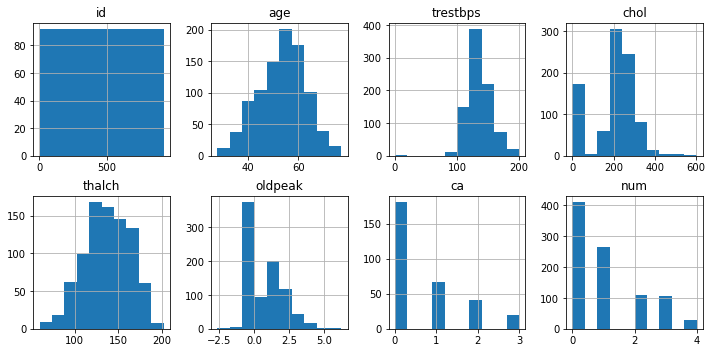

In [107]:
df.hist(figsize=(12,12),layout=(4,4))

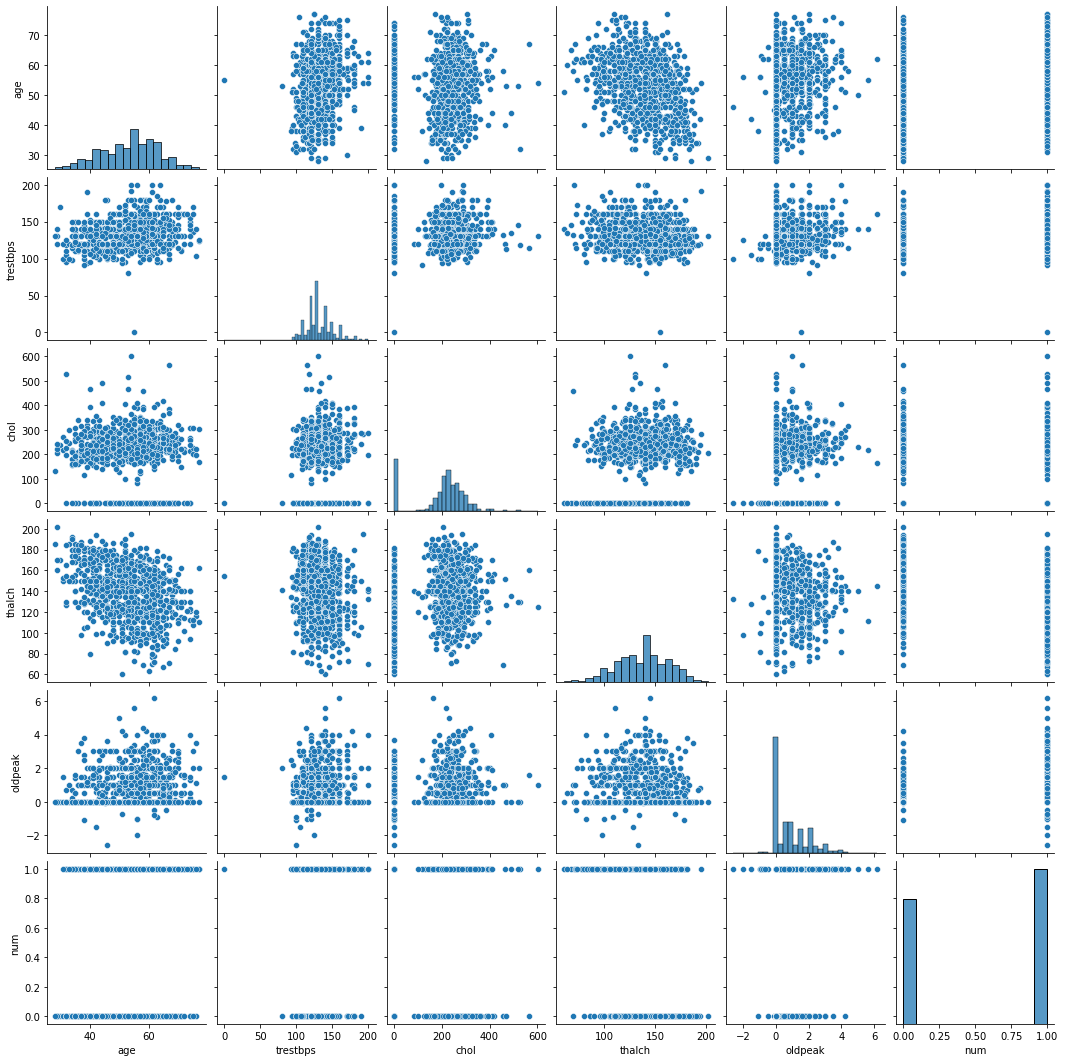

In [141]:
sns.pairplot(df)

<AxesSubplot:>

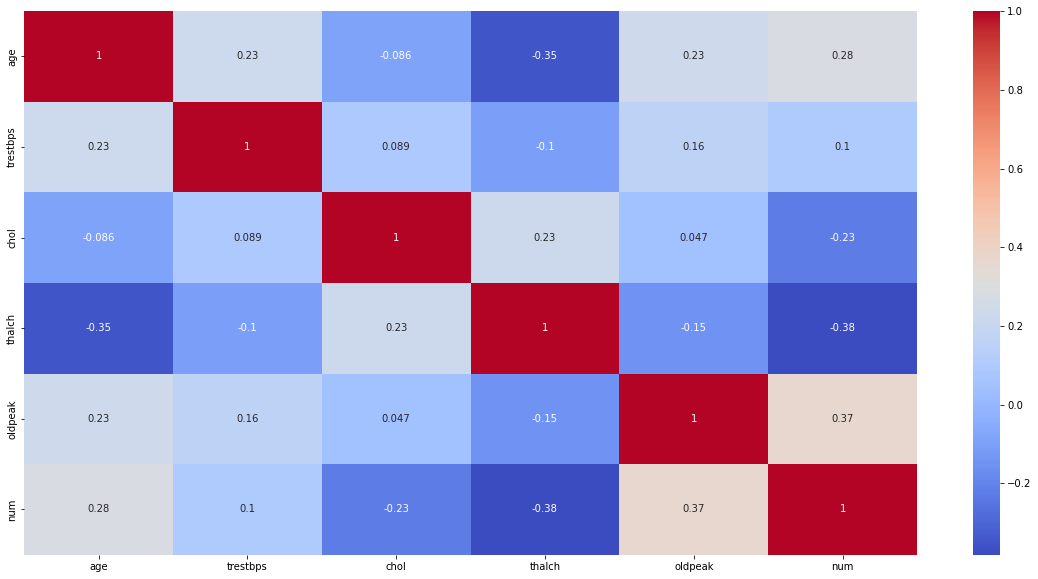

In [142]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [108]:
# Handling missing values with proper central tendency values (based on histograms and description)
df.trestbps=heart.trestbps.fillna(df['trestbps'].median())

df.chol=heart.chol.fillna(df['chol'].median())

df.fbs=df.fbs.fillna('False')

df.restecg=df.restecg.fillna('normal')

df.thalch=df.thalch.fillna(heart['thalch'].median())

df.exang=df.exang.fillna('False')

df.oldpeak=df.oldpeak.fillna(heart['oldpeak'].median())

df.slope=df.slope.fillna('flat')

df.thal=df.thal.fillna('normal')

# +dropping unnecessary columns
df.drop(['dataset','id','ca'],axis=1,inplace=True)

In [111]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
843,57,Male,asymptomatic,110.0,197.0,False,lv hypertrophy,100.0,False,0.0,flat,normal,0
334,39,Male,atypical angina,120.0,223.0,False,st-t abnormality,146.0,False,2.0,upsloping,normal,0
105,54,Male,atypical angina,108.0,309.0,False,normal,156.0,False,0.0,upsloping,reversable defect,0
837,63,Male,asymptomatic,110.0,252.0,False,st-t abnormality,140.0,True,2.0,flat,normal,2
59,51,Male,typical angina,125.0,213.0,False,lv hypertrophy,125.0,True,1.4,upsloping,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,55,Male,atypical angina,145.0,326.0,False,normal,155.0,False,0.0,flat,normal,0
243,61,Male,typical angina,134.0,234.0,False,normal,145.0,False,2.6,flat,normal,2
62,58,Male,asymptomatic,128.0,216.0,False,lv hypertrophy,131.0,True,2.2,flat,reversable defect,1
15,57,Male,non-anginal,150.0,168.0,False,normal,174.0,False,1.6,upsloping,normal,0


In [113]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [115]:
# Converting the target to binary 0/1. 
df.loc[heart["num"] == 2,"num"]=1
df.loc[heart["num"] ==3,"num"]=1
df.loc[heart["num"] ==4,"num"]=1
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
843,57,Male,asymptomatic,110.0,197.0,False,lv hypertrophy,100.0,False,0.0,flat,normal,0
334,39,Male,atypical angina,120.0,223.0,False,st-t abnormality,146.0,False,2.0,upsloping,normal,0
105,54,Male,atypical angina,108.0,309.0,False,normal,156.0,False,0.0,upsloping,reversable defect,0
837,63,Male,asymptomatic,110.0,252.0,False,st-t abnormality,140.0,True,2.0,flat,normal,1
59,51,Male,typical angina,125.0,213.0,False,lv hypertrophy,125.0,True,1.4,upsloping,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,55,Male,atypical angina,145.0,326.0,False,normal,155.0,False,0.0,flat,normal,0
243,61,Male,typical angina,134.0,234.0,False,normal,145.0,False,2.6,flat,normal,1
62,58,Male,asymptomatic,128.0,216.0,False,lv hypertrophy,131.0,True,2.2,flat,reversable defect,1
15,57,Male,non-anginal,150.0,168.0,False,normal,174.0,False,1.6,upsloping,normal,0


In [116]:
df['num'].value_counts()

1    509
0    411
Name: num, dtype: int64

In [118]:
# Converting the categorical features to numerical.  
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'])
dataset


,age,trestbps,chol,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_False,fbs_True,fbs_False,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,exang_False,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
843,57,110.0,197.0,100.0,0.0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
334,39,120.0,223.0,146.0,2.0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0
105,54,108.0,309.0,156.0,0.0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1
837,63,110.0,252.0,140.0,2.0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0
59,51,125.0,213.0,125.0,1.4,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,55,145.0,326.0,155.0,0.0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0
243,61,134.0,234.0,145.0,2.6,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0
62,58,128.0,216.0,131.0,2.2,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
15,57,150.0,168.0,174.0,1.6,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0


In [120]:
#Scaling the features prior to modeling. 
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
scale = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
dataset[scale] = standardScaler.fit_transform(df[scale])
dataset

,age,trestbps,chol,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_False,fbs_True,fbs_False,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,exang_False,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
843,0.370413,-1.192741,-0.026690,-1.499803,-0.806886,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
334,-1.540504,-0.650479,0.211884,0.330565,1.084414,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0
105,0.051927,-1.301193,1.001013,0.728471,-0.806886,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1
837,1.007386,-1.192741,0.477986,0.091821,1.084414,1,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0
59,-0.266559,-0.379348,0.120125,-0.505038,0.517024,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,0.158089,0.705176,1.157004,0.688680,-0.806886,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0
243,0.795061,0.108688,0.312819,0.290774,1.651804,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0
62,0.476575,-0.216669,0.147653,-0.266294,1.273544,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
15,0.370413,0.976307,-0.292792,1.444701,0.706154,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0


In [123]:
# splitting the data to features and target
f=dataset.drop(columns='num', axis=1 )
t=dataset['num']

In [124]:
f

,age,trestbps,chol,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_False,fbs_True,fbs_False,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,exang_False,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
843,0.370413,-1.192741,-0.026690,-1.499803,-0.806886,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
334,-1.540504,-0.650479,0.211884,0.330565,1.084414,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0
105,0.051927,-1.301193,1.001013,0.728471,-0.806886,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1
837,1.007386,-1.192741,0.477986,0.091821,1.084414,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0
59,-0.266559,-0.379348,0.120125,-0.505038,0.517024,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,0.158089,0.705176,1.157004,0.688680,-0.806886,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0
243,0.795061,0.108688,0.312819,0.290774,1.651804,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0
62,0.476575,-0.216669,0.147653,-0.266294,1.273544,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
15,0.370413,0.976307,-0.292792,1.444701,0.706154,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0


In [125]:
t

843    0
334    0
105    0
837    1
59     0
      ..
464    0
243    1
62     1
15     0
399    0
Name: num, Length: 920, dtype: int64

In [126]:
#split our data to train and test
f_train, f_test, t_train,t_test= train_test_split(f,t,test_size=0.2,random_state=2, stratify=t )

In [127]:
print(f.shape,f_train.shape, f_test.shape)

(920, 26) (736, 26) (184, 26)


In [128]:
# model training 
model=LogisticRegression()

In [133]:
model.fit(f_train,t_train)

LogisticRegression()

In [139]:
f_train_prediction = model.predict(f_train)
training_data_accuracy = accuracy_score(f_train_prediction, t_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8315217391304348


In [140]:
f_test_prediction = model.predict(f_test)
test_data_accuracy = accuracy_score(f_test_prediction, t_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.782608695652174
